<a href="https://colab.research.google.com/github/aibak365/randow_to_try/blob/main/SlightlyChangeInSSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
!pip install torchmetrics
from torchmetrics.image import StructuralSimilarityIndexMeasure as SSIM
import torchvision.transforms as transforms

In [14]:
def tensor_to_image(tensor):
  """
  Converts a tensor representing an image to a PIL image object.

  Args:
      tensor: A tensor with shape (C, H, W) representing an image.
              C - number of channels (usually 3 for RGB)
              H - height of the image
              W - width of the image

  Returns:
      A PIL image object that can be displayed or saved.
  """
  # Check if number of channels is supported (RGB - 3 channels)


  # Move the channel dimension to be the last dimension
  tensor = tensor.permute(1, 2, 0)

  # If the tensor has only 1 channel, convert it to RGB by replicating the channel
  if tensor.size(0) == 1:
    tensor = tensor.repeat(3, 1, 1)

  # Clip values between 0 and 255 (assuming they are normalized)
  tensor = tensor.clamp(0, 1)

  # Convert the tensor to a NumPy array
  tensor = tensor.cpu().detach().numpy()

  # Convert the NumPy array to a uint8 array (uint8 for representing pixel values 0-255)
  image_array = (tensor * 255).astype(np.uint8)

  # Create a PIL image from the array
  return Image.fromarray(image_array)

In [70]:
# Define image size
image_size = (224, 224) # please try in 1024*1024 image u will see that \
#the amount of noise there is not toticabel to human eyes significant,please check it \
#and notice how in high resoulation images these noise are less to be spot by eyes

# Create original tensor with textured grass pattern
x_original = torch.zeros(1, 3, image_size[0], image_size[1])  # Include channel dimension
grass_pattern = torch.linspace(0.2, 0.8, image_size[0]).unsqueeze(1).repeat(1, image_size[1]) # Reshape to (256, 256)
# Reshape the random tensor to match grass_pattern
x_original[:, 0] = grass_pattern * 0.4 + torch.rand(image_size[0], image_size[1]) * 0.1  # Green channel with texture

# Create edited tensor with slight noise (humanly imperceptible)
x_edited = x_original.clone()
noise = torch.randn(1, 3, image_size[0], image_size[1]) * 0.05  # Add noise to each channel
x_edited += noise

# Calculate SSIM score using PyTorch-Metrics
ssim_metric = SSIM(data_range=1.0)  # Assuming pixel values between 0 and 1
ssim_score = ssim_metric(x_original, x_edited)

# Print SSIM result (might be low despite visually similar images)
print(f"SSIM Score: {ssim_score.item()}")

SSIM Score: 0.2994026243686676


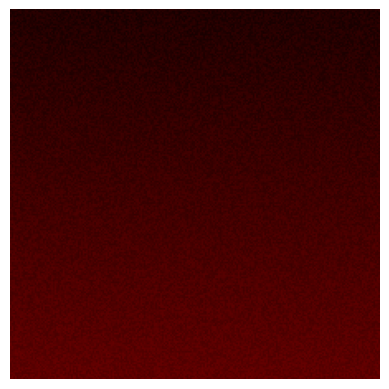

In [71]:
image = tensor_to_image(x_original.squeeze(0))

# Save the image to a file
image.save("converted_image_original_color.jpg")
image1 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

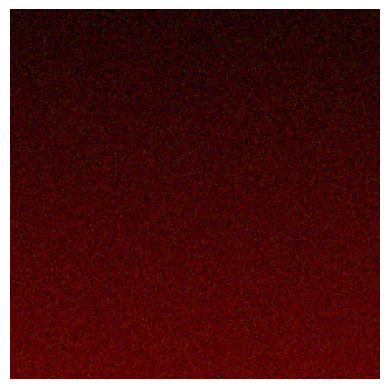

In [72]:
image = tensor_to_image(x_edited.squeeze(0))

# Save the image to a file
image.save("converted_image_edited_color.jpg")
image1 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [77]:
from urllib.request import urlretrieve
url = "https://images.ctfassets.net/h6goo9gw1hh6/2QZf9aXx4UIiuCEDJ4fqQn/1c223d3e186fd7c9cf443b79c8a3bf92/meme_minutes_COVER.jpg?w=800&h=800&fl=progressive&q=70&fm=jpg"
filename = "cat.jpg"
urlretrieve(url, filename)

img = Image.open(filename)
transform = transforms.Compose([
    transforms.ToTensor(),
])
x_original = transform(img)

# Create edited tensor with slight noise and color shift
x_edited = x_original.clone()

# Add slight Gaussian noise (humanly imperceptible)
noise = torch.randn(x_edited.shape) * 0.07
x_edited += noise

# Apply subtle color shift (barely noticeable)
x_edited[:, 0] += 0.02  # Increase red channel slightly

# Calculate SSIM score using PyTorch-Metrics
ssim_metric = SSIM(data_range=1.0)  # Assuming pixel values between 0 and 1
ssim_score = ssim_metric(x_original.unsqueeze(0), x_edited.unsqueeze(0))
same_image_ssim_score = ssim_metric(x_original.unsqueeze(0), x_original.unsqueeze(0))
# Print SSIM result (might be low despite visually similar images)
print(f"SSIM Score: {ssim_score.item()}")
print(f"SSIM Score for the same image twice: {same_image_ssim_score.item()}")

SSIM Score: 0.32761433720588684
SSIM Score for the same image twice: 0.9999442100524902


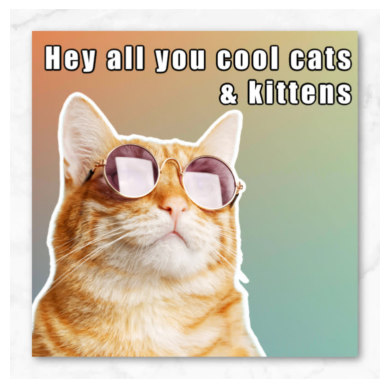

In [75]:
image = tensor_to_image(x_original.squeeze(0))

# Save the image to a file
image.save("converted_image_original.jpg")
image1 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

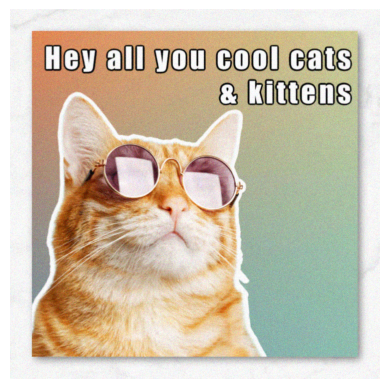

In [76]:
image = tensor_to_image(x_edited.squeeze(0))

# Save the image to a file
image.save("converted_image_edited.jpg")
image1 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()